# Rock Type Predictions using ML

Lithology is an important factor in the exploration, drilling and production of oil and gas resources. Understanding the type and properties of the rocks and minerals in a specific area can provide valuable information about the location and size of oil and gas reservoirs, as well as the potential for recovery of these resources. This information is critical in determining the feasibility and potential success of oil and gas projects.


In this project, we are going to train a Machine learning algorithm model with features of a Well to predict the type of rock (lithology) in the Reservoir.

### Import Libraries

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Get the data

data = pd.read_csv('xeek_subset.csv')

In [62]:
data.head().style.background_gradient(cmap='cool')

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITH
0,15/9-13,494.528000,437641.968750,6470972.500000,-469.501831,NORDLAND GP.,nan,19.480835,nan,1.611410,1.798681,1.884186,80.200851,nan,nan,20.915468,161.131180,24.612379,nan,34.636410,nan,nan,-0.574928,nan,nan,nan,nan,65000,1.000000,Shale
1,15/9-13,494.680000,437641.968750,6470972.500000,-469.653809,NORDLAND GP.,nan,19.468800,nan,1.618070,1.795641,1.889794,79.262886,nan,nan,19.383013,160.603470,23.895531,nan,34.636410,nan,nan,-0.570188,nan,nan,nan,nan,65000,1.000000,Shale
2,15/9-13,494.832000,437641.968750,6470972.500000,-469.805786,NORDLAND GP.,nan,19.468800,nan,1.626459,1.800733,1.896523,74.821999,nan,nan,22.591518,160.173615,23.916357,nan,34.779556,nan,nan,-0.574245,nan,nan,nan,nan,65000,1.000000,Shale
3,15/9-13,494.984000,437641.968750,6470972.500000,-469.957794,NORDLAND GP.,nan,19.459282,nan,1.621594,1.801517,1.891913,72.878922,nan,nan,32.191910,160.149429,23.793688,nan,39.965164,nan,nan,-0.586315,nan,nan,nan,nan,65000,1.000000,Shale
4,15/9-13,495.136000,437641.968750,6470972.500000,-470.109772,NORDLAND GP.,nan,19.453100,nan,1.602679,1.795299,1.880034,71.729141,nan,nan,38.495632,160.128342,24.104078,nan,57.483765,nan,nan,-0.597914,nan,nan,nan,nan,65000,1.000000,Shale


In [63]:
data.shape

(133198, 30)

In [64]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'LITH'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               133198 non-null  object 
 1   DEPTH_MD                           133198 non-null  float64
 2   X_LOC                              125805 non-null  float64
 3   Y_LOC                              125805 non-null  float64
 4   Z_LOC                              125805 non-null  float64
 5   GROUP                              133198 non-null  object 
 6   FORMATION                          111632 non-null  object 
 7   CALI                               133006 non-null  float64
 8   RSHA                               62039 non-null   float64
 9   RMED                               125556 non-null  float64
 10  RDEP                               125805 non-null  float64
 11  RHOB                               1080

In [66]:
num_col = data.select_dtypes(exclude='object').columns
print(num_col)

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS',
       'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')


In [67]:
cat_col = data.select_dtypes(include='object').columns
print(cat_col)

Index(['WELL', 'GROUP', 'FORMATION', 'LITH'], dtype='object')


In [68]:
## add num form of the target column
data['LITH_codes'] = data['LITH'].astype('category').cat.codes

### Check NaN 

In [69]:
data.isna().sum()

WELL                                      0
DEPTH_MD                                  0
X_LOC                                  7393
Y_LOC                                  7393
Z_LOC                                  7393
GROUP                                     0
FORMATION                             21566
CALI                                    192
RSHA                                  71159
RMED                                   7642
RDEP                                   7393
RHOB                                  25145
GR                                        0
SGR                                  115848
NPHI                                  41473
PEF                                   32358
DTC                                     563
SP                                    39518
BS                                    35669
ROP                                    2744
DTS                                  121014
DCAL                                  76998
DRHO                            

- There a lots missing values in the dataset, therefore we can not drop nan.

- But we are going to replace nan with the median of the values in numerical columns and replace nan with mode in categorical columns.

In [70]:
# check percentage of missing values in each column
(data.isna().sum()/len(data))*100

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 5.550384
Y_LOC                                 5.550384
Z_LOC                                 5.550384
GROUP                                 0.000000
FORMATION                            16.190934
CALI                                  0.144146
RSHA                                 53.423475
RMED                                  5.737323
RDEP                                  5.550384
RHOB                                 18.877911
GR                                    0.000000
SGR                                  86.974279
NPHI                                 31.136353
PEF                                  24.293158
DTC                                   0.422679
SP                                   29.668614
BS                                   26.778931
ROP                                   2.060091
DTS                                  90.852716
DCAL         

- Drop columns that have missing values greater 50% of the len(data)
- Drop unnecessary columns

In [71]:
data.describe().style.background_gradient(cmap='Blues')

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITH_codes
count,133198.000000,125805.000000,125805.000000,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,17350.000000,91725.000000,100840.000000,132635.000000,93680.000000,97529.000000,130454.000000,12184.000000,56200.000000,105539.000000,101644.000000,1635.000000,13473.000000,38946.000000,133198.000000,133183.000000,133198.000000
mean,1792.944663,451235.640835,6471391.931640,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,59.813135,0.355602,4.511845,122.700286,91.608922,12.194539,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168,63261.582892,1.235796,7.748352
std,739.441515,15299.395264,30944.486918,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,25.538669,0.143857,5.092807,34.234879,98.781404,3.143410,45.592228,44.358622,43.000304,0.067312,17.882420,2.261201,14.319902,333.547482,13623.352961,0.480781,2.075712
min,415.261599,436790.843750,6429286.500000,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,-196.869995,-0.023143,1.010027,7.415132,-2.199269,8.500000,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024,30000.000000,1.000000,0.000000
25%,1182.822400,437640.781250,6453743.000000,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,41.281138,0.234927,2.857540,87.899776,48.808243,8.500000,9.650485,149.754013,0.007800,-0.007736,0.137800,1.387308,14.260232,0.537328,65000.000000,1.000000,7.000000
50%,1747.524495,444152.093750,6463019.000000,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,62.973612,0.382014,3.780121,135.968094,70.282761,12.250001,22.362363,162.537949,0.415419,0.003215,0.152180,2.133351,24.598738,0.879455,65000.000000,1.000000,9.000000
75%,2413.874901,460442.093750,6478963.000000,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,73.933750,0.480985,5.098502,147.388626,92.173889,12.250001,35.444058,190.082294,1.118416,0.022928,0.168955,2.860770,33.749100,1.519061,65030.000000,1.000000,9.000000
max,3272.024000,476770.156250,6539631.000000,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,152.516830,0.817310,365.575592,230.432953,526.547302,26.000002,2224.647461,377.327789,10006.789063,0.433157,185.730927,23.590172,86.378632,2000.000000,99000.000000,3.000000,10.000000


In [72]:
# Lets visualize the whole data

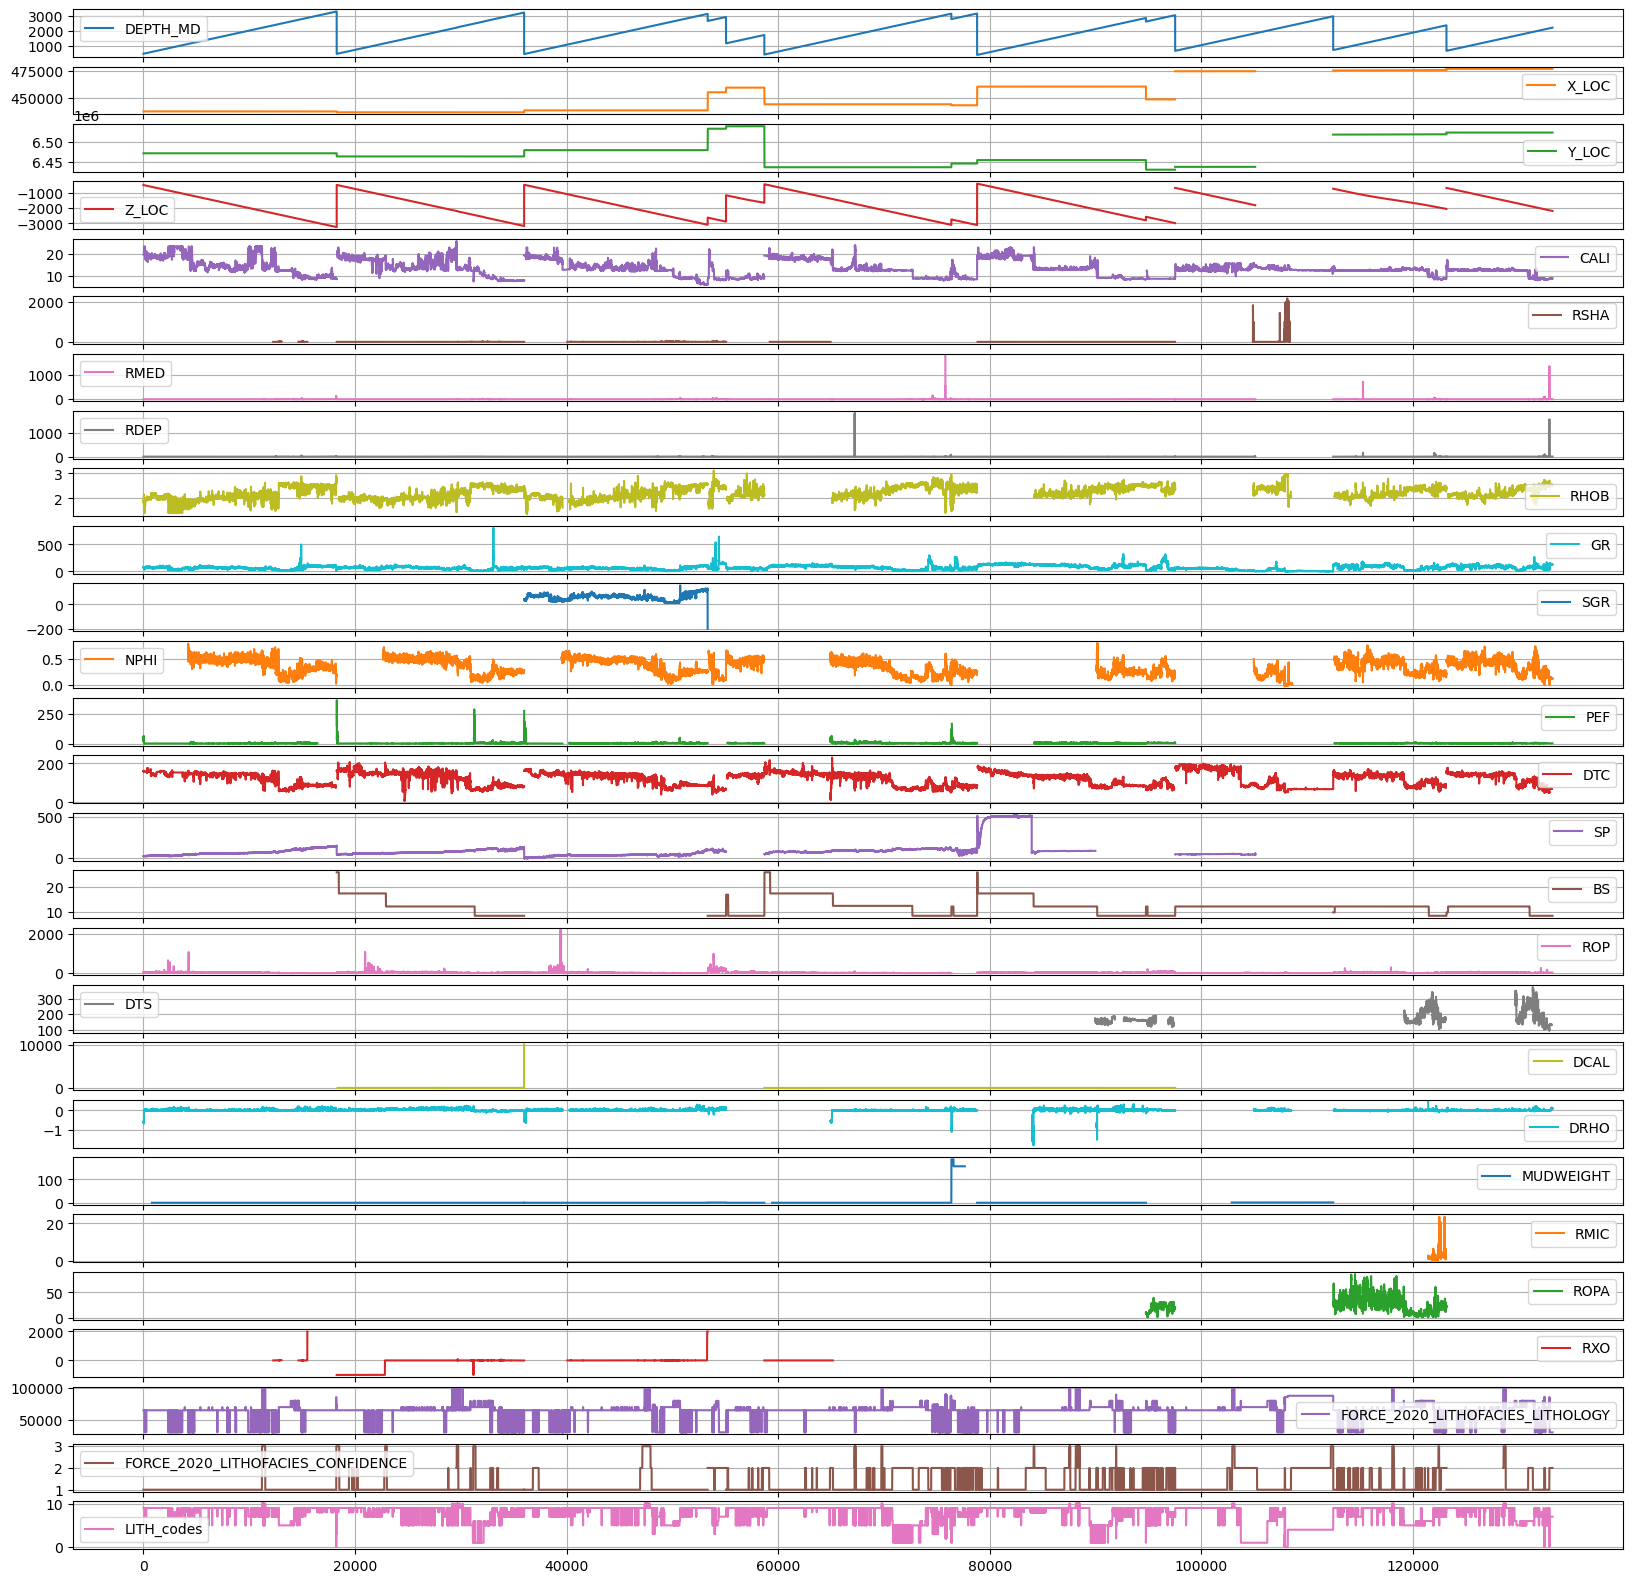

In [73]:
plt.style.use('default')
data.plot(subplots=True, grid=True, figsize=(20,20))
plt.interactive(True)
plt.show()

- from the above visualization, columns with higher percentage of missing values has breakages in their plots
-

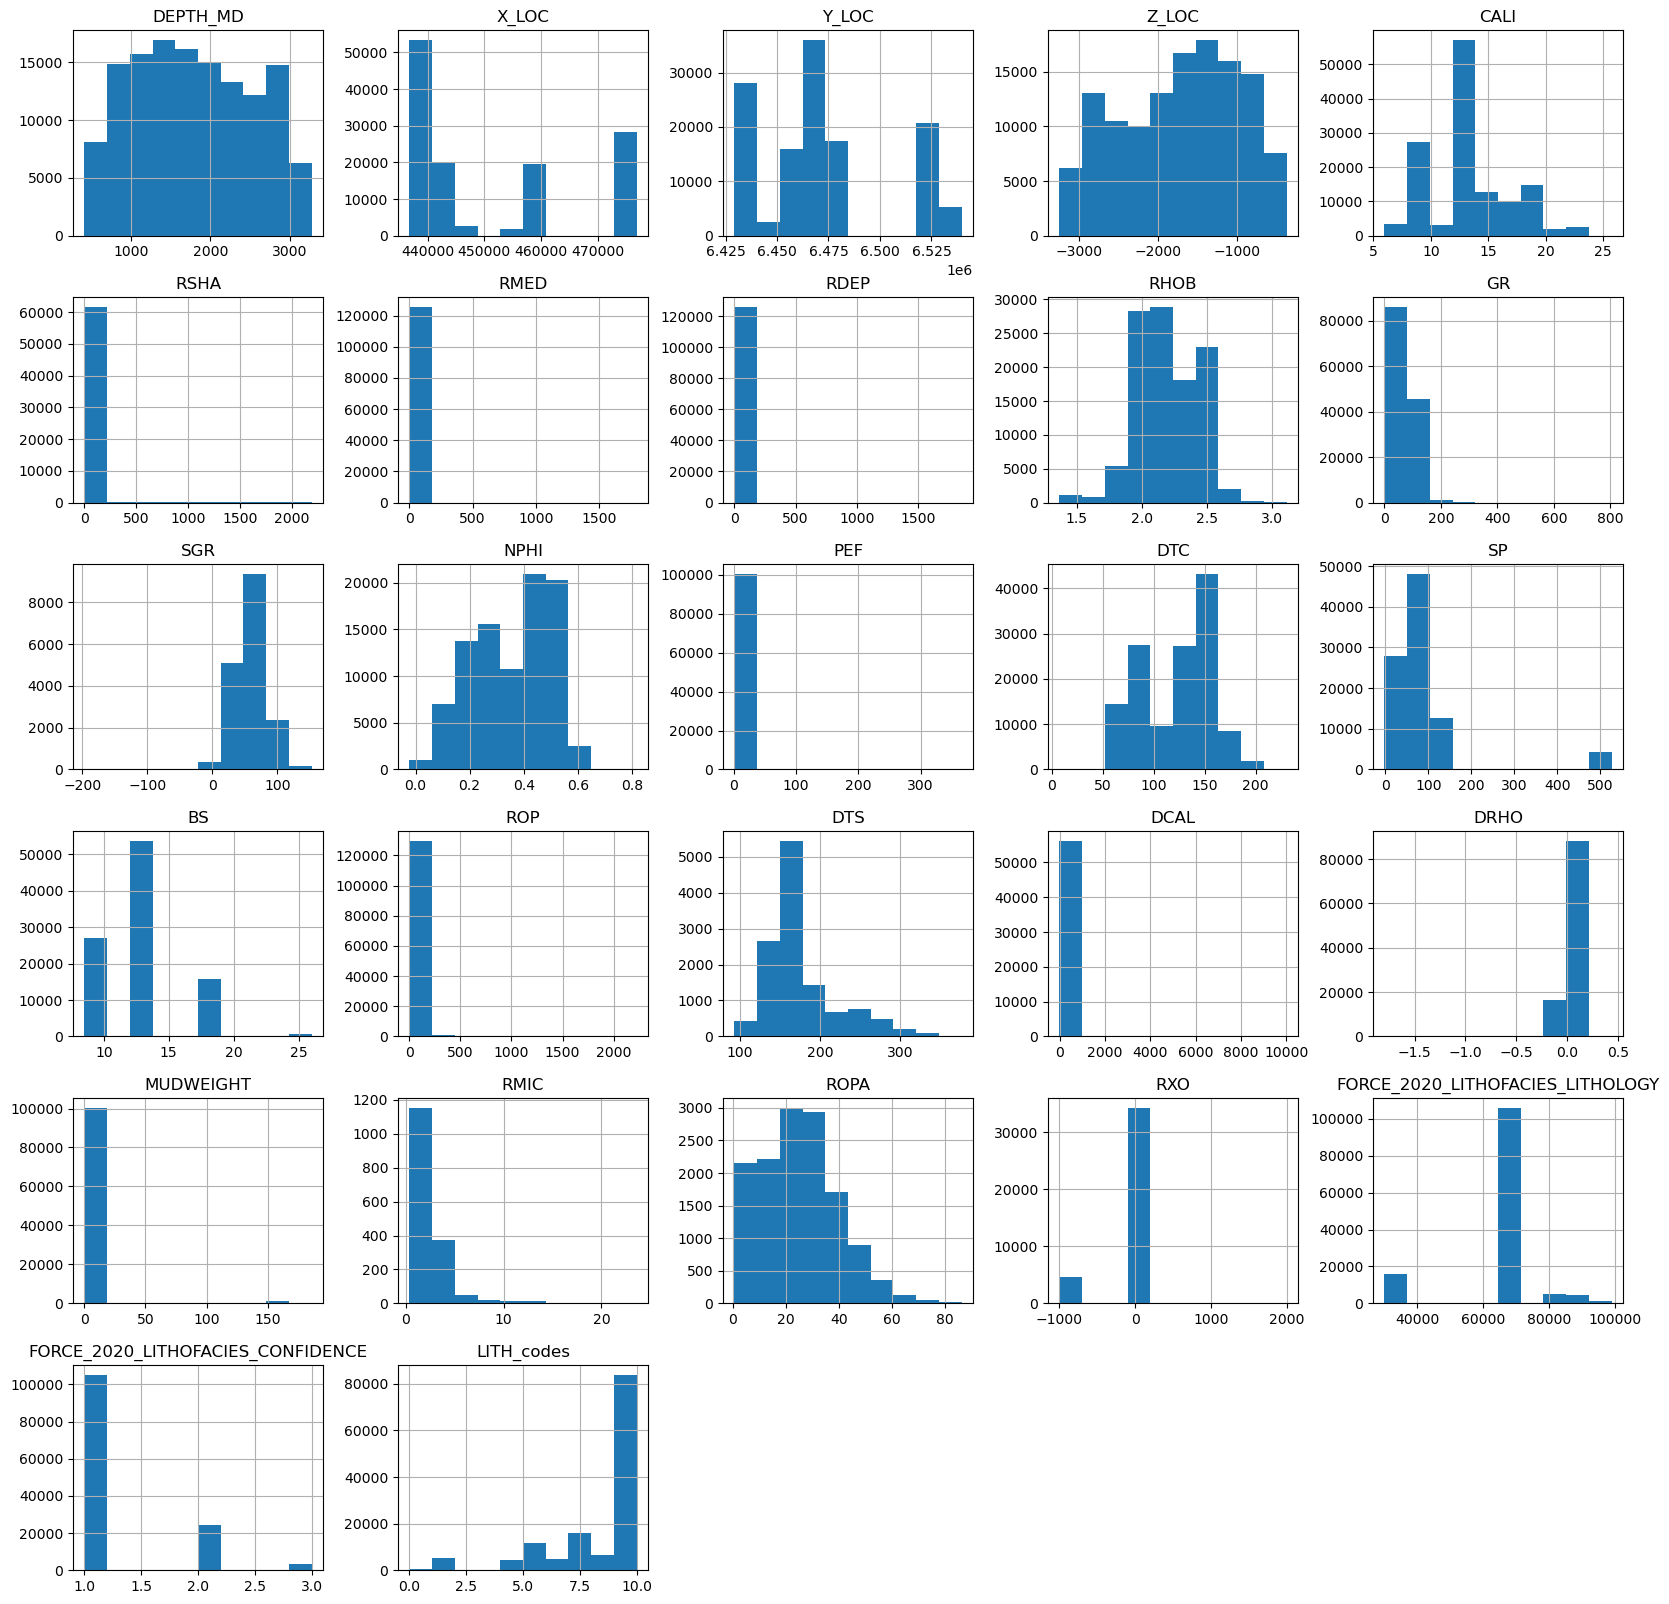

In [74]:
num_cols = data.select_dtypes(exclude='object')
plt.style.use('default')
num_cols.hist(figsize=[20,20])
plt.interactive(True)
plt.show()

- Most of the data in various columns are not normally distributed

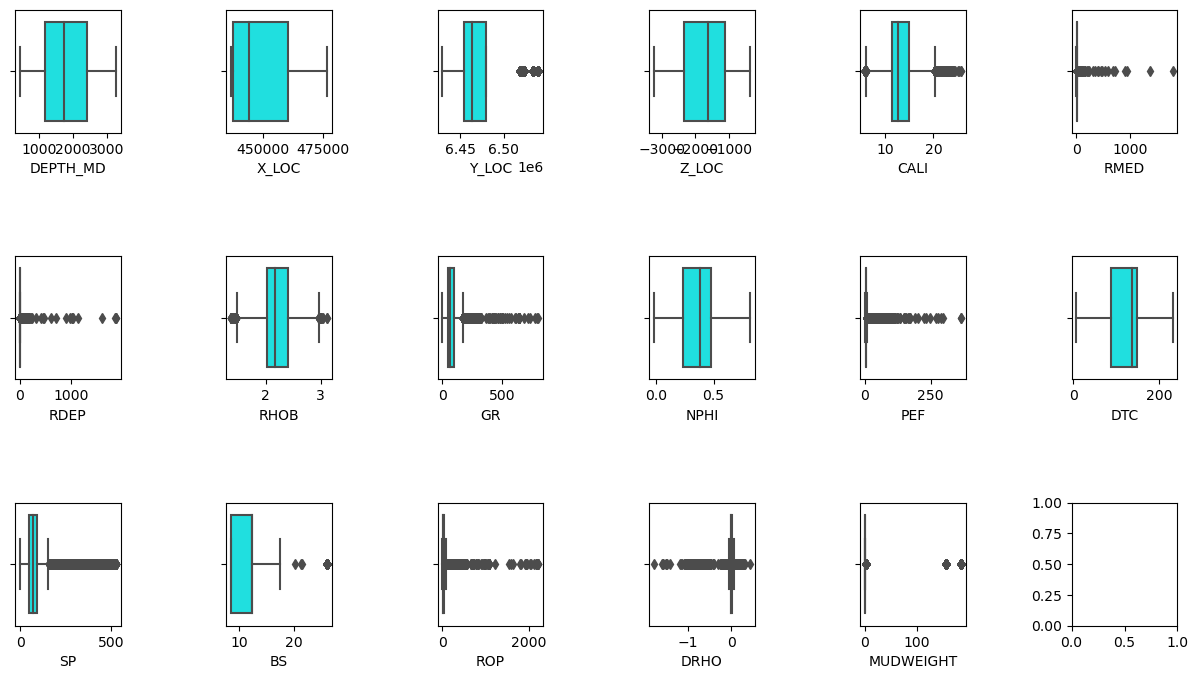

In [75]:
# boxplot of the columns in the dataset 
num_col = ['DEPTH_MD', 'X_LOC', 'Y_LOC','Z_LOC' ,'CALI', 'RMED', 'RDEP', 'RHOB','GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DRHO', 'MUDWEIGHT']
fig,ax =plt.subplots(3,6, figsize=(15,8))

for idx, num_col in enumerate(num_col):
    row, col = idx //6, idx % 6
    sns.boxplot(x=num_col ,data=data, ax=ax[row,col],color='cyan')
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- There are alot of outliers in the data which needs to be treated

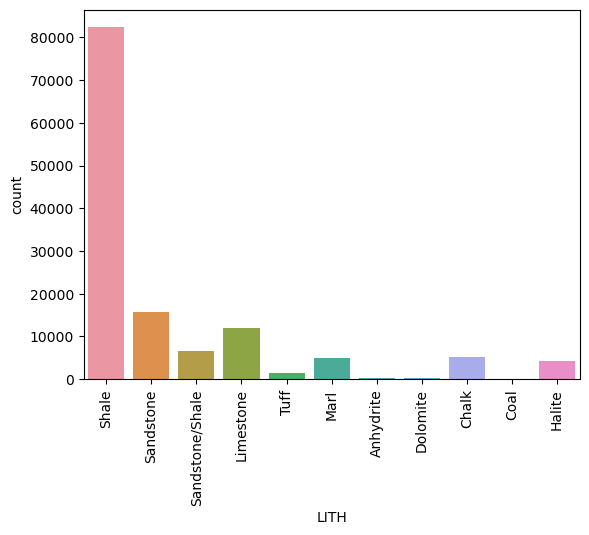

In [76]:
# visualize the target column
sns.countplot(x='LITH',data=data)
plt.xticks(rotation=90)
plt.show()

- Shale has the highest number of appearance, followed by Sandstone and so on
- Coal, Anhydrite and Dolomite has lowest frequency

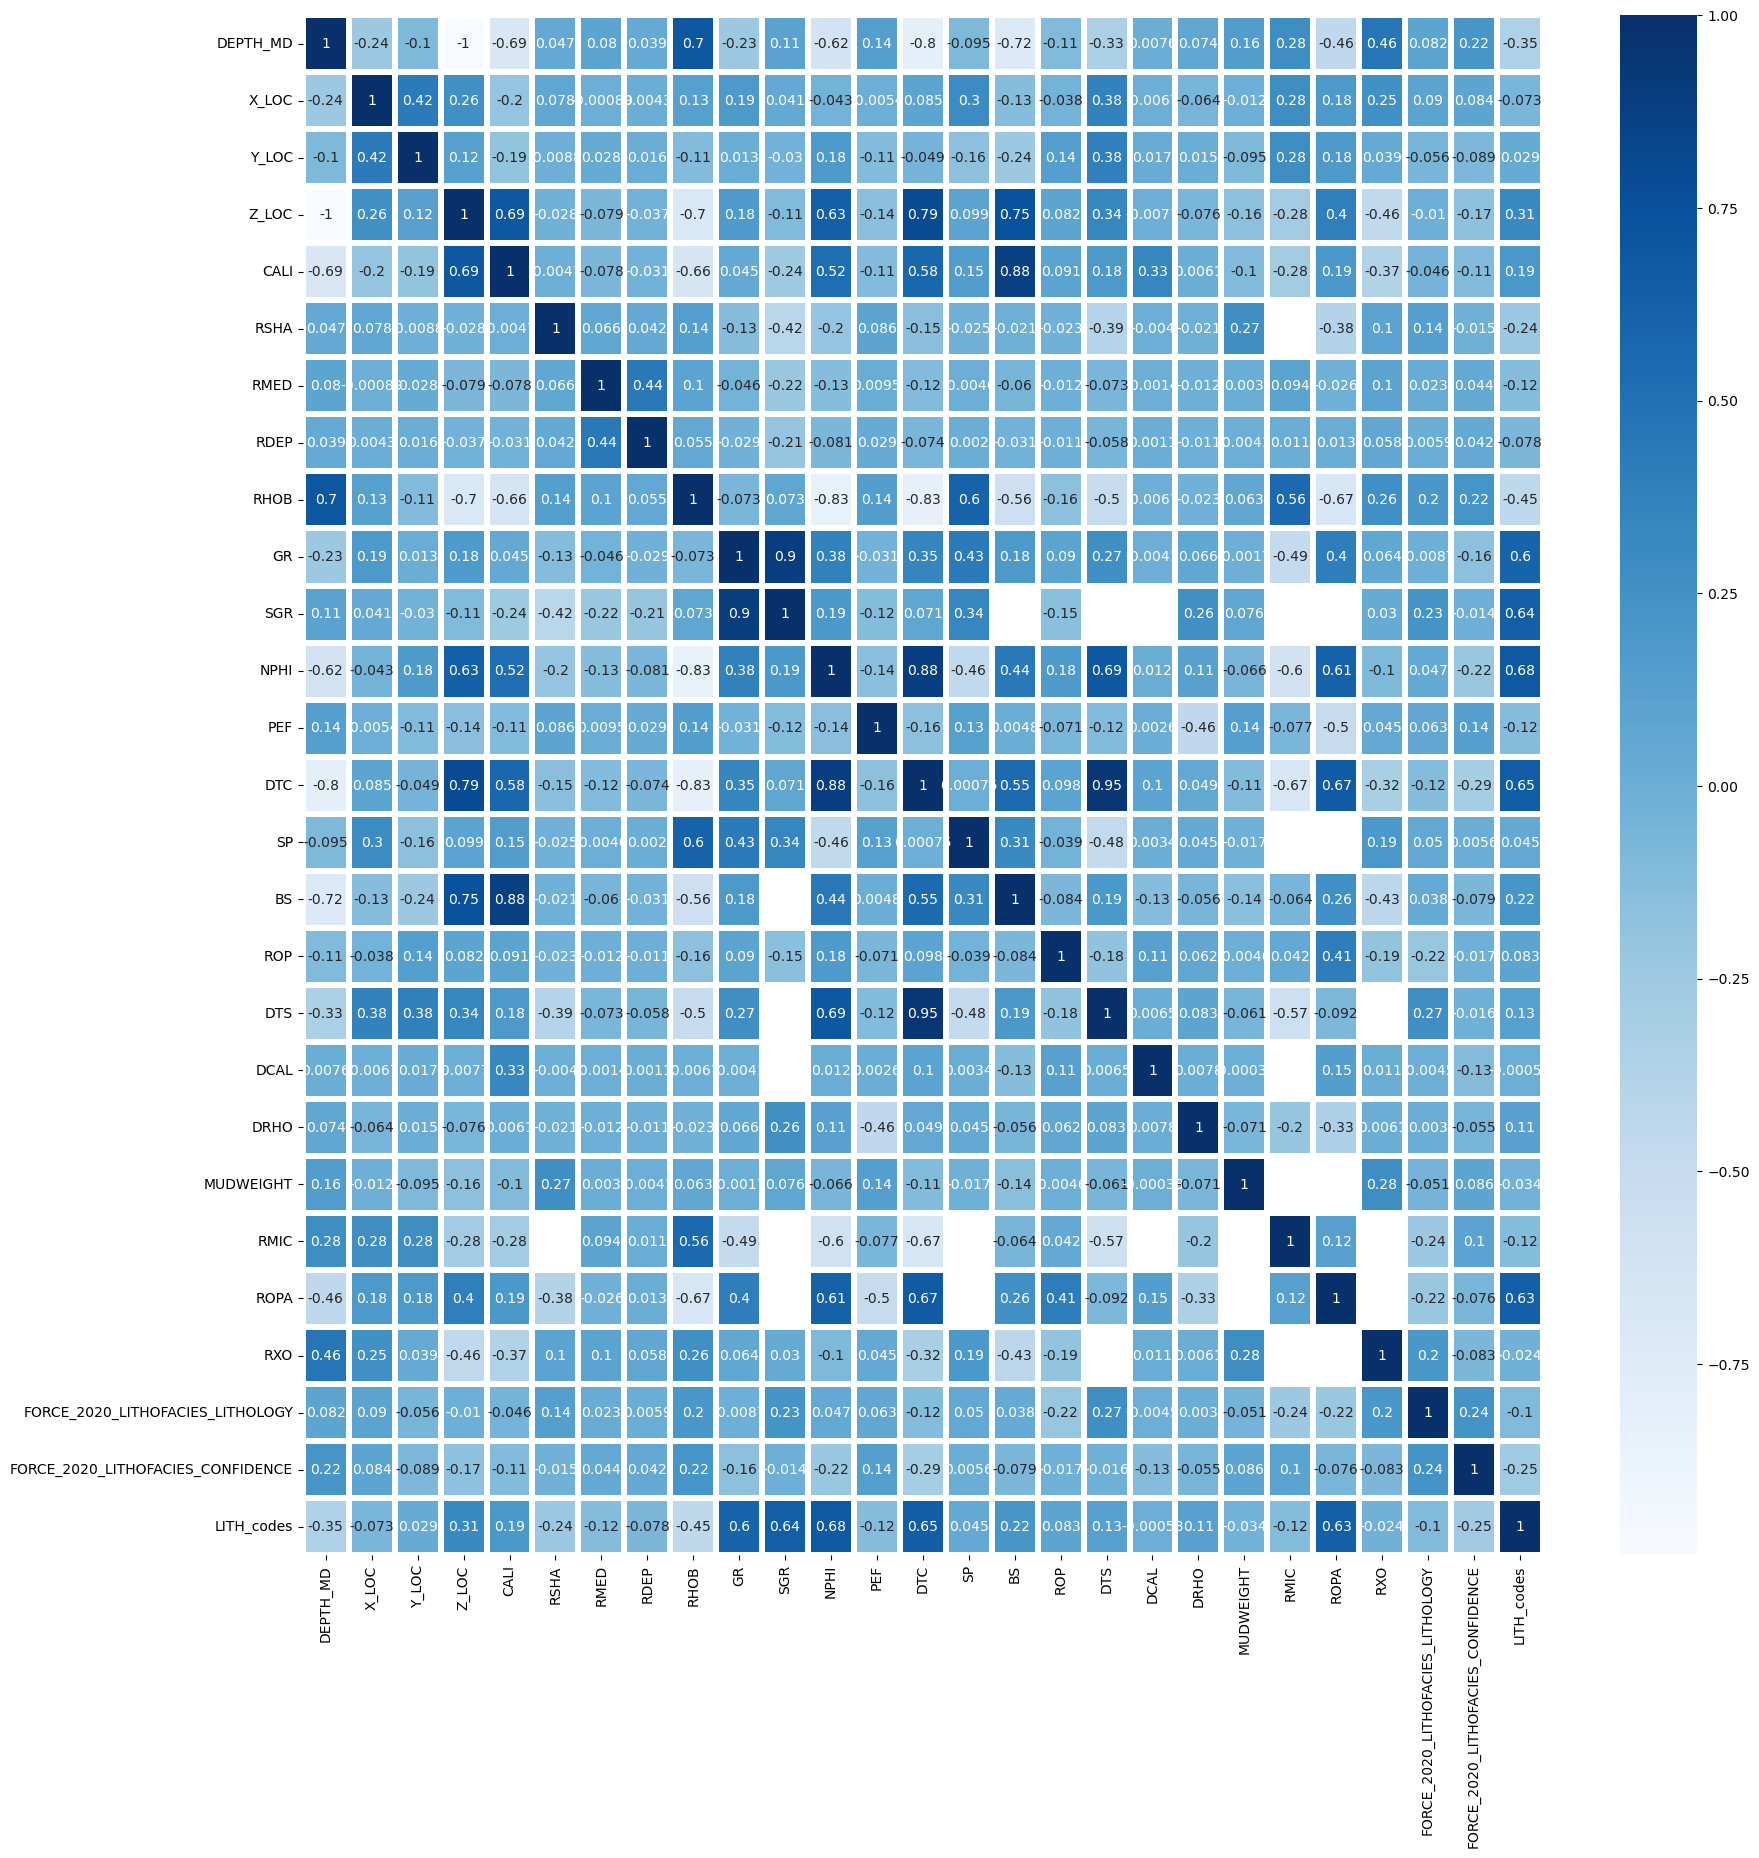

In [77]:

corr =num_cols.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap='Blues',lw=3)
plt.interactive(True)
plt.show()

### Data Preprocessing

In [79]:
# treate missing values
def fill_missing_with_median(df):
    for col in df.columns:
        if df[col].dtype in ['float64','int64']:
            median = df[col].median()
            df[col].fillna(median, inplace=True)
        else:
            mode =df[col].mode()[0]
            df[col].fillna(mode,inplace=True)
            
    return df
            


In [80]:
data= fill_missing_with_median(data)

In [81]:
data.isna().sum()

WELL                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
GROUP                                0
FORMATION                            0
CALI                                 0
RSHA                                 0
RMED                                 0
RDEP                                 0
RHOB                                 0
GR                                   0
SGR                                  0
NPHI                                 0
PEF                                  0
DTC                                  0
SP                                   0
BS                                   0
ROP                                  0
DTS                                  0
DCAL                                 0
DRHO                                 0
MUDWEIGHT                            0
RMIC                                 0
ROPA                     

In [53]:
# drop unnecessary columns
data.drop(['WELL','GROUP','FORMATION','FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE','RXO','ROPA','RMIC','DCAL','DTS','SGR','RSHA'],axis=1,inplace=True)

In [82]:
## remove outliers
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtypes !='object':
            q1,q3 = df[col].quantile([0.25,0.75])
            iqr = q3-q1
            lower = q1-1.5*iqr
            upper = q3+1.5*iqr
            df[col] = np.where(df[col]<lower,lower,df[col])
            df[col] = np.where(df[col]>upper,upper,df[col])
    return df

In [83]:
data = remove_outliers(data)

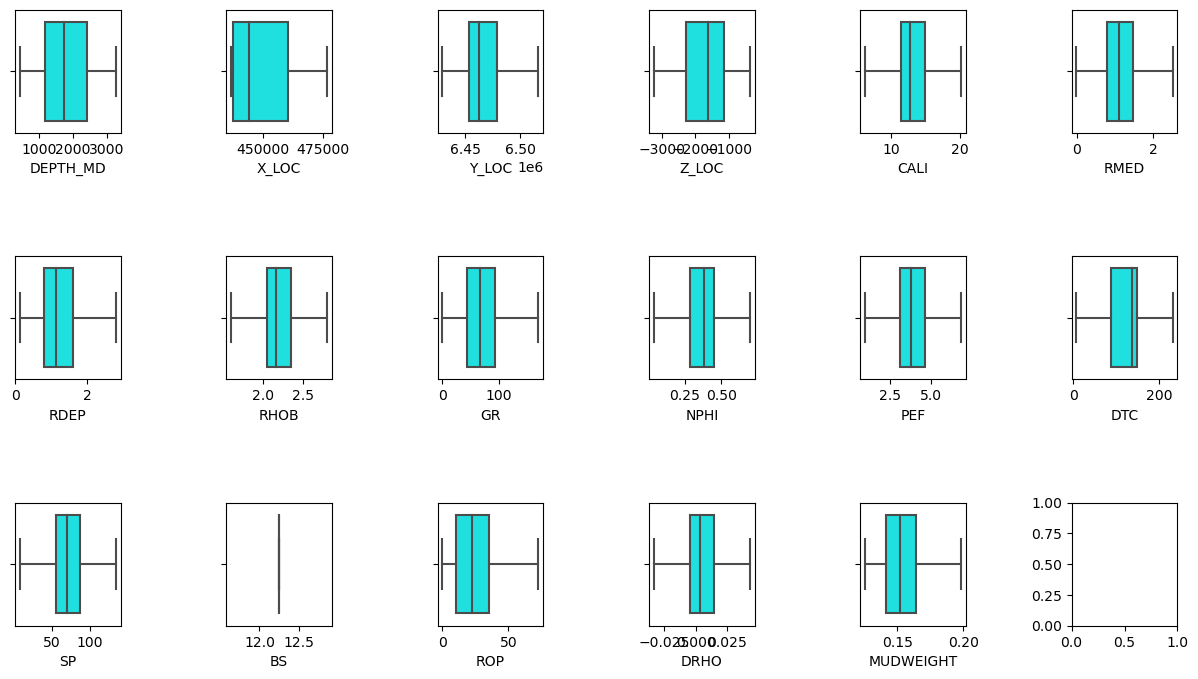

In [84]:
# check outliers again
num_col = ['DEPTH_MD', 'X_LOC', 'Y_LOC','Z_LOC' ,'CALI', 'RMED', 'RDEP', 'RHOB','GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DRHO', 'MUDWEIGHT']
fig,ax =plt.subplots(3,6, figsize=(15,8))

for idx, num_col in enumerate(num_col):
    row, col = idx //6, idx % 6
    sns.boxplot(x=num_col ,data=data, ax=ax[row,col],color='cyan')
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

##### Prepare the data for ML

In [86]:
# X = features
# Y = target

X = data.iloc[:,:-2]
Y = data.iloc[:,-2]

In [58]:

X.sample(4)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,MUDWEIGHT
51641,2856.853998,438597.40625,6478968.5,-2834.648193,9.162702,1.739437,1.688619,2.503019,87.004250,0.273397,5.197321,89.364067,48.437920,NaN,4.311282,0.003265,0.161766
21286,943.688000,436815.09375,6462990.5,-918.669495,17.246120,0.773868,0.837886,2.050149,66.032265,NaN,2.973974,145.714569,53.450012,17.500000,34.812580,0.007460,0.140197
34338,2946.288000,436797.46875,6463018.5,-2920.817383,7.552751,0.652532,0.426938,2.247736,43.289902,0.285028,5.869117,95.028214,86.483627,8.500000,34.242653,-0.029730,0.179740
113054,823.947199,475280.21875,6516793.0,-799.773254,12.336018,0.764577,0.769529,2.041368,44.550304,0.345821,2.284768,141.724823,NaN,12.250001,23.013317,-0.021644,NaN


In [87]:
Y.sample(5)

18181         Shale
3012      Sandstone
113403        Shale
40396         Shale
94942     Limestone
Name: LITH, dtype: object

In [88]:
print(X.shape)
print(Y.shape)

(133198, 29)
(133198,)


#### Train Test split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42,stratify=Y)

In [91]:
## Use MinMaxScaler to standardize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

ValueError: could not convert string to float: '15/9-17'

## Build the ML models

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

#### RandomForestClassifier

In [78]:
rf = RandomForestClassifier()
#train the rf model
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)
print("Test score",accuracy_score(y_test,rf_pred))
print("Train score:",rf.score(x_train,y_train))

Test score 0.9697897897897898
Train score: 1.0


#### LinearSVC

In [79]:
lsvc = LinearSVC()
#train the rf model
lsvc.fit(x_train,y_train)
lsvc_pred =lsvc.predict(x_test)
print("Test score",accuracy_score(y_test,lsvc_pred))
print("Train score:",lsvc.score(x_train,y_train))

Test score 0.8098798798798799
Train score: 0.8123085547258203


#### LogisticRegression

In [80]:
lr = LogisticRegression()
#train the rf model
lr.fit(x_train,y_train)
lr_pred =lr.predict(x_test)
print("Test score",accuracy_score(y_test,lr_pred))
print("Train score:",lr.score(x_train,y_train))

Test score 0.8366366366366367
Train score: 0.8379146729664257


#### DecisionTreeClassifier

In [81]:
tree =DecisionTreeClassifier()
#train the rf model
tree.fit(x_train,y_train)
tree_pred =tree.predict(x_test)
print("Test score",accuracy_score(y_test,tree_pred))
print("Train score:",tree.score(x_train,y_train))

Test score 0.9456756756756757
Train score: 1.0


#### KNN

In [82]:
knn = KNeighborsClassifier()
#train the rf model
knn.fit(x_train,y_train)
knn_pred =knn.predict(x_test)
print("Test score",accuracy_score(y_test,knn_pred))
print("Train score:",knn.score(x_train,y_train))

Test score 0.9432732732732733
Train score: 0.9646038959738934


#### RidgeClassifier

In [83]:
rg = RidgeClassifier()
#train the rf model
rg.fit(x_train,y_train)
rg_pred =rg.predict(x_test)
print("Test score",accuracy_score(y_test,rg_pred))
print("Train score:",rg.score(x_train,y_train))

Test score 0.7858558558558558
Train score: 0.7865022322769225


#### AdaBoostClassifier

In [84]:
ada_model = AdaBoostClassifier()
#train the rf model
ada_model.fit(x_train,y_train)
ada_model_pred =ada_model.predict(x_test)
print("Test score",accuracy_score(y_test,ada_model_pred))
print("Train score:",ada_model.score(x_train,y_train))

Test score 0.6903903903903904
Train score: 0.6912650903922001
